In [1]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
AC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_AC.csv')
MC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_MC.csv')

In [9]:
AC_df.head()

,Curve_ID,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,0,panel31,5plex_A,ad,RM5,10000,20201202_01,1.047102,1.044508,1.040169,...,1.079054,1.080444,1.082378,1.084868,1.087228,1.088792,1.089030,1.089370,1.090364,1.091523
1,1,panel31,5plex_A,ad,RM5,10000,20201202_01,1.055056,1.044100,1.034911,...,1.077810,1.081243,1.085042,1.086968,1.088373,1.088361,1.088422,1.088637,1.090999,1.093670
2,2,panel31,5plex_A,ad,RM5,10000,20201202_01,1.025152,1.012527,1.000595,...,1.036369,1.038103,1.039515,1.041150,1.042766,1.044282,1.046117,1.046840,1.046953,1.047534
3,3,panel31,5plex_A,ad,RM5,10000,20201202_01,1.066100,1.055951,1.045311,...,1.061660,1.062129,1.063178,1.064482,1.065405,1.065576,1.065704,1.065845,1.066014,1.066355
4,4,panel31,5plex_A,ad,RM5,10000,20201202_01,1.067173,1.052578,1.038806,...,1.078364,1.078525,1.078718,1.078760,1.079006,1.080497,1.082366,1.084685,1.086773,1.087387


In [30]:
AC_df.shape

(110880, 42)

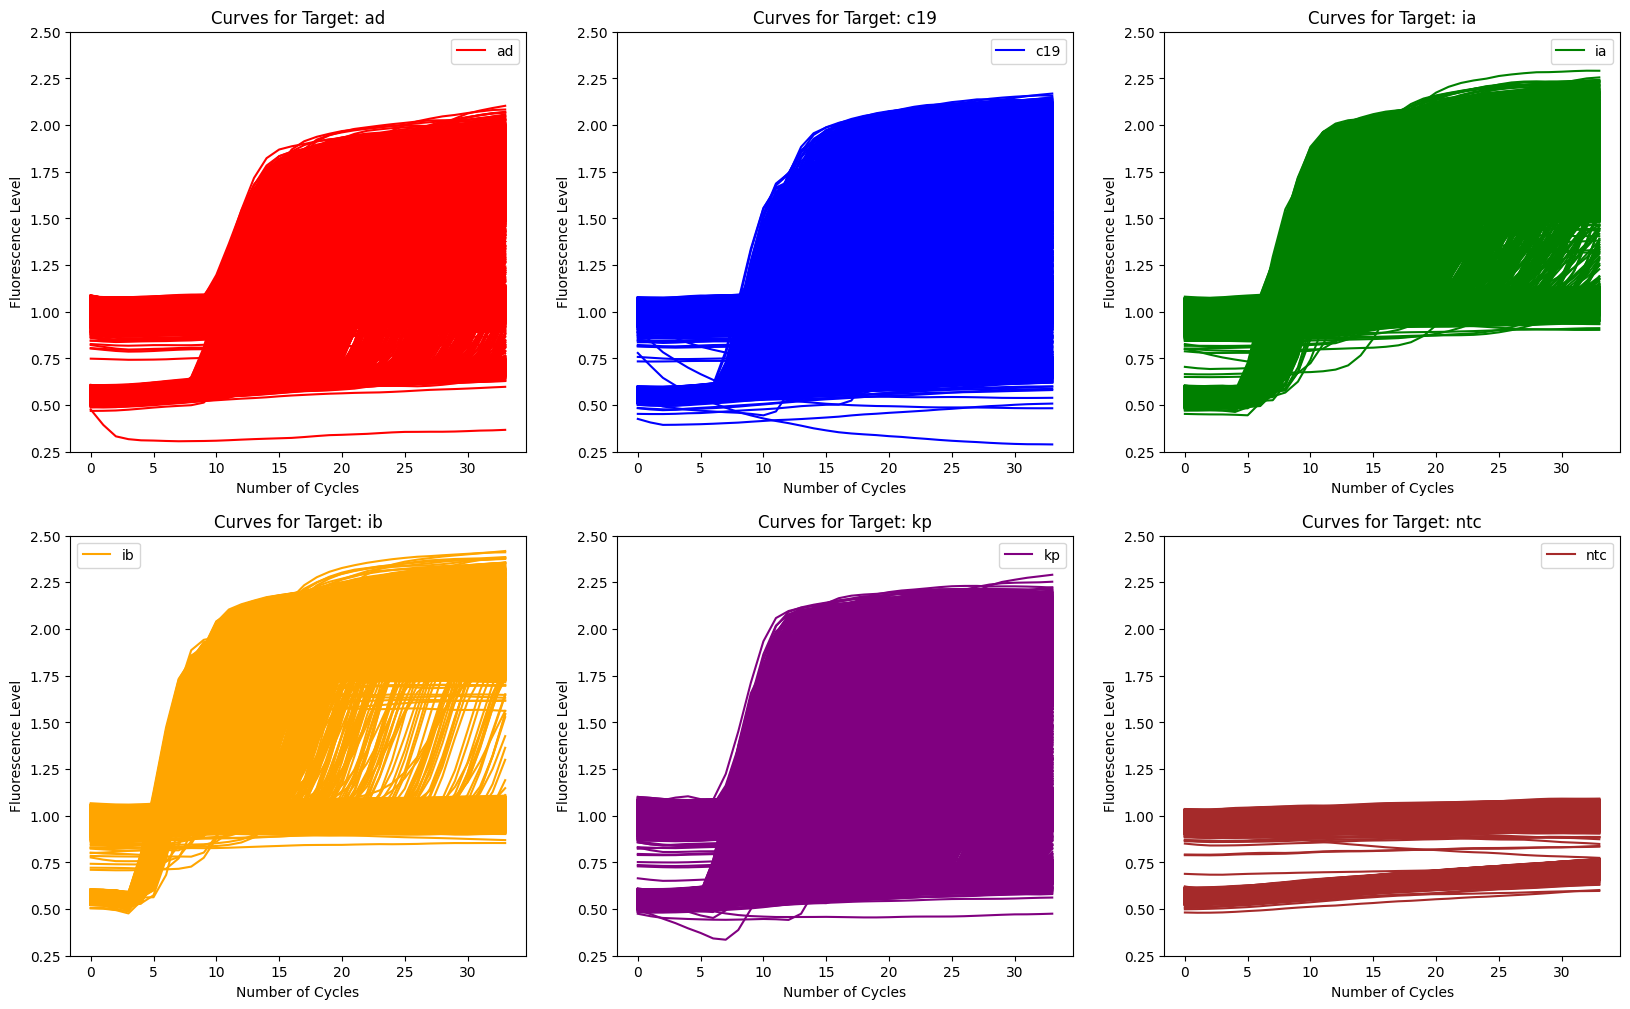

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt

# Assuming AC_df is your DataFrame with targets and curves
targets = sorted(AC_df['Target'].unique())
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # Set the colors for each target

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()  # Flatten the subplot grid


# Create a separate plot for each target
for i, target in enumerate(targets):
    ax = axs[i]  # Select the appropriate subplot
    curves = AC_df[AC_df['Target'] == target]  # Extract the curves for the target
    for _, curve in curves.iterrows():
        x = range(35)  # Match length of y (indices 0-34)
        y = curve.values[8:43]  # Extract the curve values from rows 8 to 42
        ax.plot(x, y, color=colors[i])  # Use the same color for all lines in one plot

    # Add legends, labels, and title to the plot
    ax.legend([target])
    ax.set_ylabel('Fluorescence Level')
    ax.set_xlabel('Number of Cycles')
    ax.set_title('Curves for Target: ' + target)
    ax.set_ylim(0.25, 2.5)


plt.tight_layout()

# Display all the plots
plt.show()


In [21]:
save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')
save_df.head()

,Unnamed: 0,group_ID,target,F_m,F_b,S_c,C_s,A_s,1,2,...,92,92.5,93,93.5,94,94.5,95,95.5,96,96.5
0,0,20201202_01panel31,ad,0.942044,0.001253,0.253992,19.253640,2.610806,0.003090,0.000707,...,0.006030,0.001871,0.001229,0.001067,0.000820,0.000582,0.000482,0.000332,0.000496,0.000212
1,1,20201202_01panel32,ad,0.910543,0.001110,0.256346,19.661298,2.688974,0.017865,0.006760,...,0.006748,0.001732,0.001235,0.000874,0.000732,0.000909,0.000868,0.000665,0.000351,-0.000205
2,2,20201202_01panel32,ad,0.838726,-0.010715,0.269210,14.463543,3.076446,0.018346,0.007313,...,0.031434,0.003747,0.001646,0.001184,0.000977,0.000771,0.001031,0.001077,0.000906,0.000962
3,3,20201202_01panel32,ad,1.033907,0.010444,0.275639,16.335664,3.269697,0.016965,0.006747,...,0.012396,0.001888,0.001087,0.000865,0.000864,0.000889,0.000759,0.000503,0.000409,0.000143
4,4,20201202_01panel32,ad,0.913684,-0.004061,0.242159,22.396716,2.537710,0.004084,0.001855,...,0.008702,0.002942,0.001719,0.001291,0.000860,0.000802,0.000722,0.000591,0.000110,0.000104


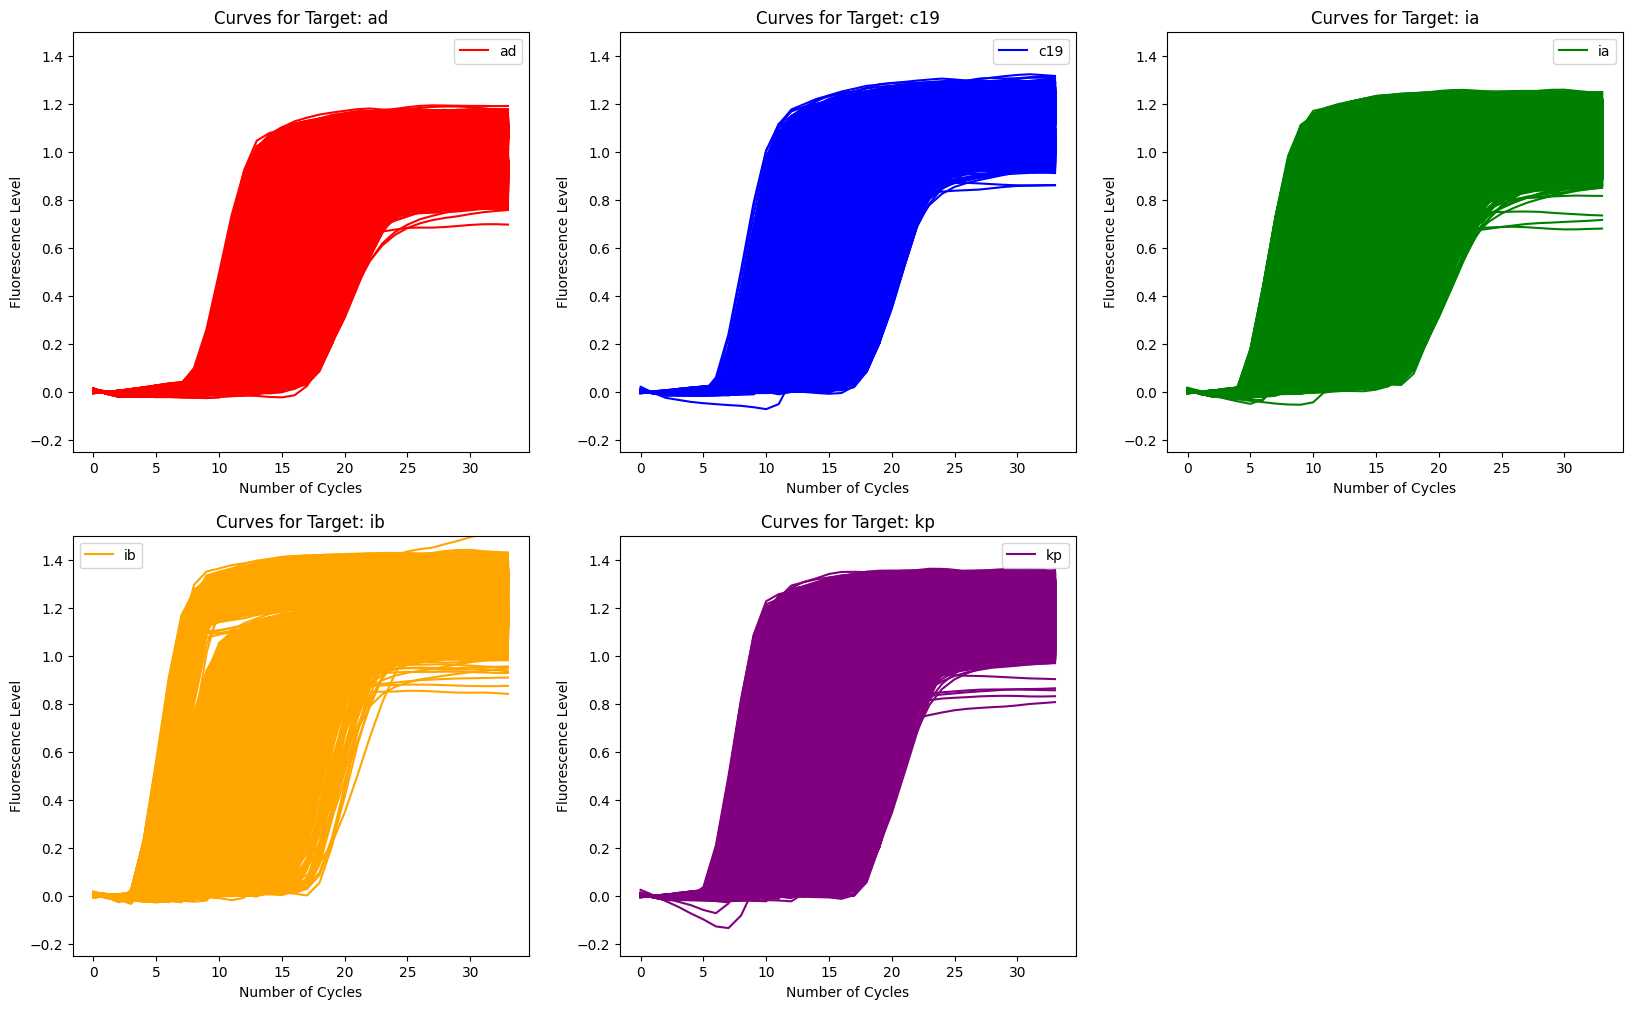

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

# Assuming AC_df is your DataFrame with targets and curves
targets = sorted(save_df['target'].unique())
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Set the colors for each target

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()  # Flatten the subplot grid


# Create a separate plot for each target
for i, target in enumerate(targets):
    ax = axs[i]  # Select the appropriate subplot
    curves = save_df[save_df['target'] == target]  # Extract the curves for the target
    for _, curve in curves.iterrows():
        x = range(34)  # Match length of y
        y = curve.values[9:43]  # Extract the curve values from rows 8 to 42
        ax.plot(x, y, color=colors[i])  # Use the same color for all lines in one plot

    # Add legends, labels, and title to the plot
    ax.legend([target])
    ax.set_ylabel('Fluorescence Level')
    ax.set_xlabel('Number of Cycles')
    ax.set_title('Curves for Target: ' + target)
    ax.set_ylim(-0.25, 1.5)

fig.delaxes(axs[5])
plt.tight_layout()

# Display all the plots
plt.show()


In [31]:
save_df['target'].value_counts()

ib     14151
ia     13847
ad     11576
kp      6457
c19     4425
Name: target, dtype: int64

In [32]:
save_df.shape

(50456, 107)

In [46]:
np.arange(65, 96.5, 0.5)

array([65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. ,
       70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5,
       76. , 76.5, 77. , 77.5, 78. , 78.5, 79. , 79.5, 80. , 80.5, 81. ,
       81.5, 82. , 82.5, 83. , 83.5, 84. , 84.5, 85. , 85.5, 86. , 86.5,
       87. , 87.5, 88. , 88.5, 89. , 89.5, 90. , 90.5, 91. , 91.5, 92. ,
       92.5, 93. , 93.5, 94. , 94.5, 95. , 95.5, 96. ])

In [35]:
MC_df.head()

,Curve_ID,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,65,65.5,66,...,92,92.5,93,93.5,94,94.5,95,95.5,96,96.5
0,0,panel31,5plex_A,ad,RM5,10000,20201202_01,0.002698,0.023037,0.024357,...,0.001146,0.001202,0.001151,0.001096,0.000883,0.000463,0.000252,0.000147,0.000064,0.000101
1,1,panel31,5plex_A,ad,RM5,10000,20201202_01,0.002927,0.023259,0.023457,...,0.000757,0.000406,0.000580,0.000678,0.000570,0.000710,0.000406,-0.000066,-0.000701,-0.002000
2,2,panel31,5plex_A,ad,RM5,10000,20201202_01,0.002683,0.022132,0.023218,...,0.000721,0.000627,0.000576,0.000642,0.000860,0.000876,0.000823,0.000785,0.000609,0.000376
3,3,panel31,5plex_A,ad,RM5,10000,20201202_01,0.002747,0.021979,0.022448,...,0.000530,0.000557,0.000713,0.000549,0.000443,0.000366,0.000174,-0.000131,-0.000239,-0.000491
4,4,panel31,5plex_A,ad,RM5,10000,20201202_01,0.003059,0.023546,0.023245,...,0.000625,0.000392,0.000330,0.000429,0.000414,0.000587,0.000696,0.000500,0.000208,-0.000608


In [52]:
MC_df.iloc[1,7:72]

65      0.002927
65.5    0.023259
66      0.023457
66.5    0.024599
67       0.02501
          ...   
94.5     0.00071
95      0.000406
95.5   -0.000066
96     -0.000701
96.5      -0.002
Name: 1, Length: 64, dtype: object

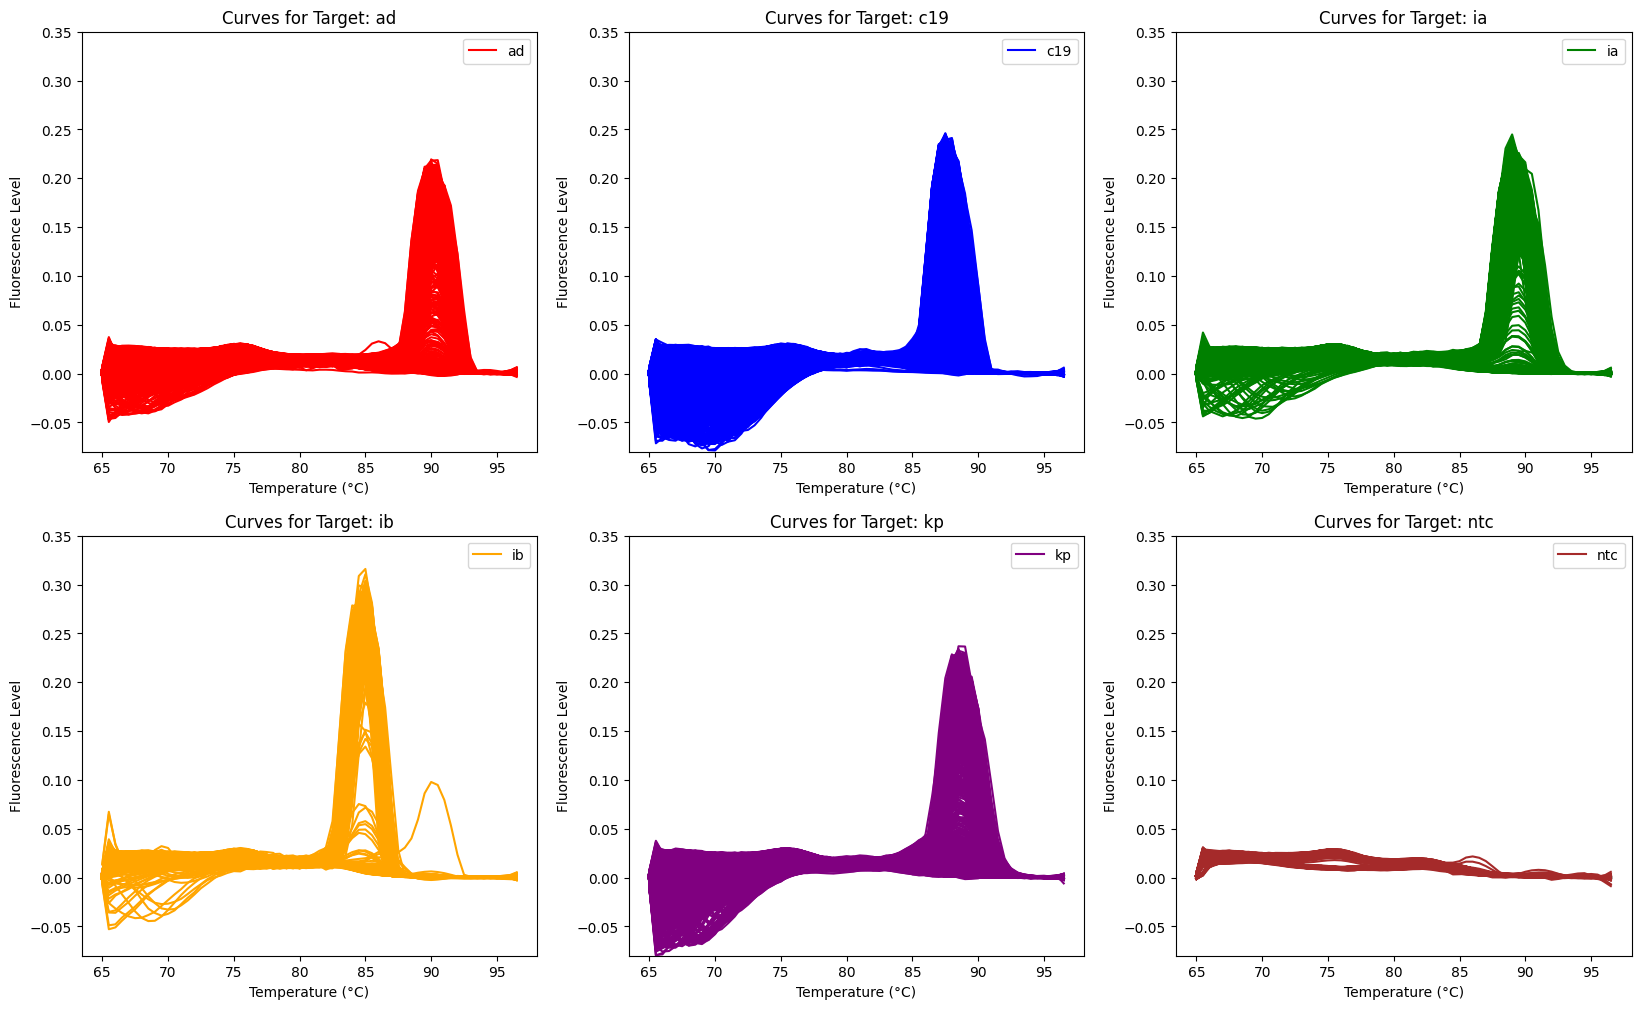

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt


targets = sorted(MC_df['Target'].unique())
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # Set the colors for each target

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()  # Flatten the subplot grid


# Create a separate plot for each target
for i, target in enumerate(targets):
    ax = axs[i]  # Select the appropriate subplot
    curves = MC_df[MC_df['Target'] == target]  # Extract the curves for the target
    for _, curve in curves.iterrows():
        x = np.arange(65, 97, 0.5)  # 64 points
        y = curve.values[7:71]  # 64 values to match x
        ax.plot(x, y, color=colors[i])  # Use the same color for all lines in one plot

    # Add legends, labels, and title to the plot
    ax.legend([target])
    ax.set_ylabel('Fluorescence Level')
    ax.set_xlabel('Temperature (°C)')
    ax.set_title('Curves for Target: ' + target)
    ax.set_ylim(-0.08, 0.35)


plt.tight_layout()

# Display all the plots
plt.show()


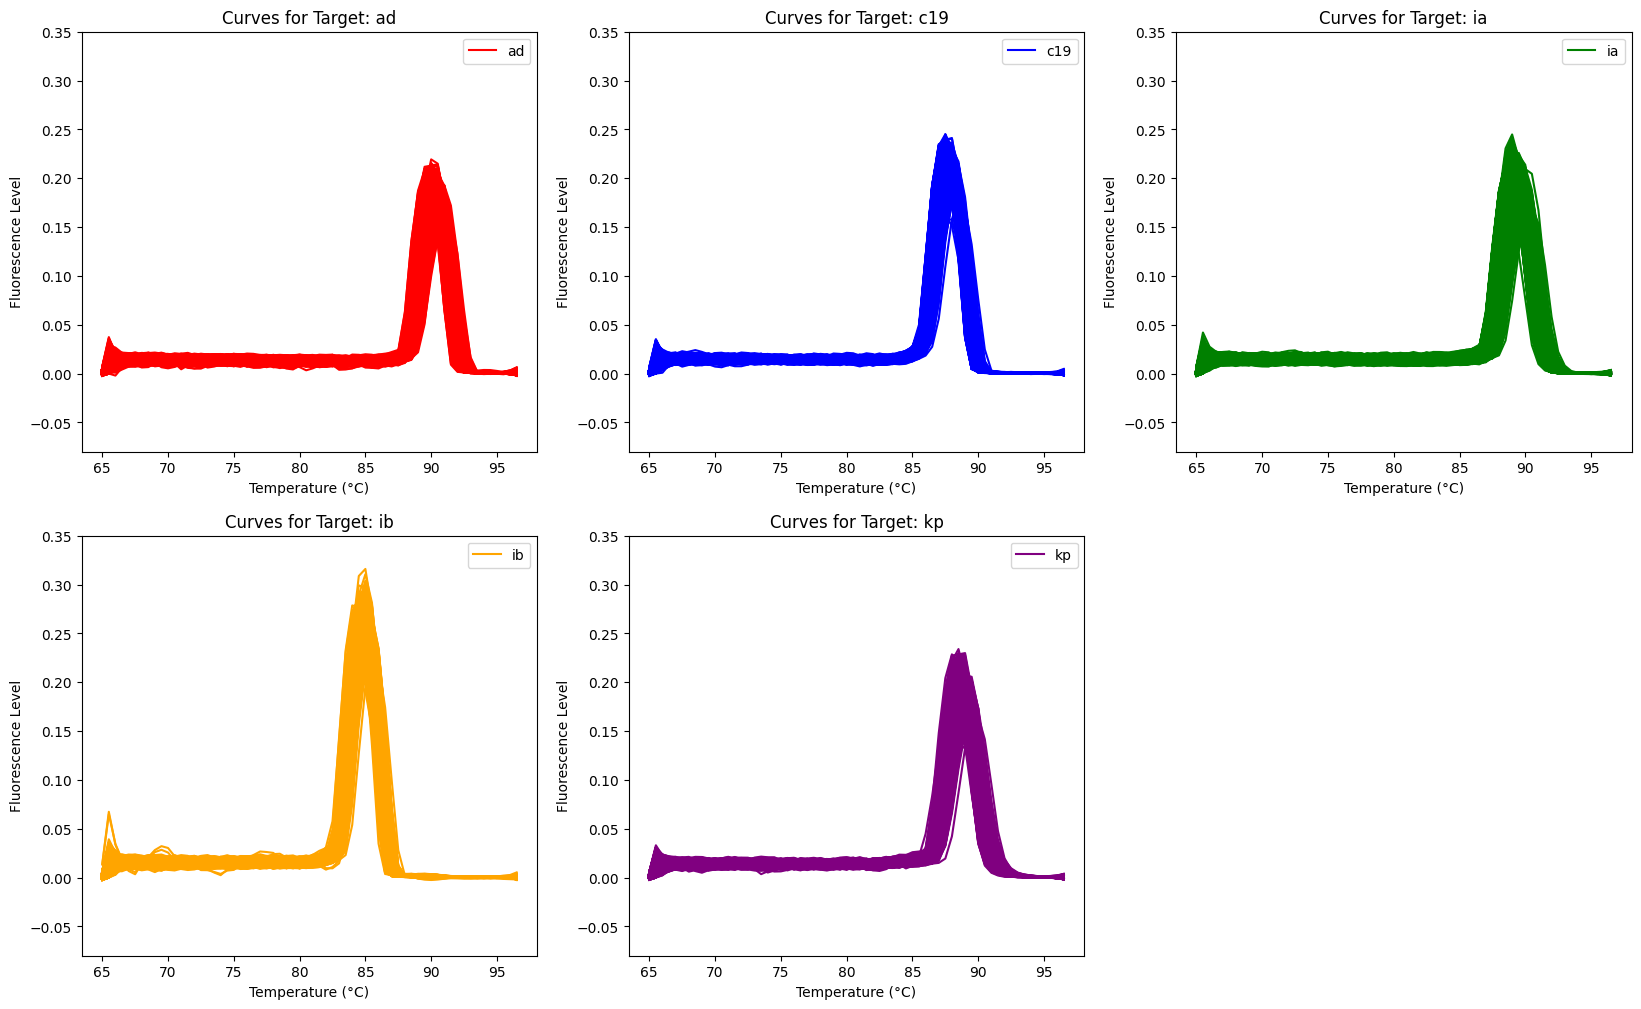

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

# Assuming AC_df is your DataFrame with targets and curves
targets = sorted(save_df['target'].unique())
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Set the colors for each target

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()  # Flatten the subplot grid


# Create a separate plot for each target
for i, target in enumerate(targets):
    ax = axs[i]  # Select the appropriate subplot
    curves = save_df[save_df['target'] == target]  # Extract the curves for the target
    for _, curve in curves.iterrows():
        x = np.arange(65, 97, 0.5)   # Assuming x-axis values are indices 0 to 34
        y = curve.values[43:107]  # Extract the curve values from rows 8 to 42
        ax.plot(x, y, color=colors[i])  # Use the same color for all lines in one plot

    # Add legends, labels, and title to the plot
    ax.legend([target])
    ax.set_ylabel('Fluorescence Level')
    ax.set_xlabel('Temperature (°C)')
    ax.set_title('Curves for Target: ' + target)
    ax.set_ylim(-0.08, 0.35)

fig.delaxes(axs[5])
plt.tight_layout()

# Display all the plots
plt.show()
